# Earthquake Impact Analysis in Afghanistan (2022)

## Objective
This notebook aims to analyze and visualize the impact of earthquakes in Afghanistan during the year 2022. By integrating and examining various geospatial datasets, we seek to identify the populations most affected by these seismic events.

## Steps of the Analysis

1. **Data Retrieval:**
   - Fetching vector data from the eoAPI.
   - Listing available datasets related to earthquakes and population density in Afghanistan.

2. **Data Visualization:**
   - Adding hexbin and shakemap layers to an interactive map.
   - Styling the layers for better understanding and differentiation.

3. **Data Processing:**
   - Performing a spatial join using the centroids of hexagons to avoid duplicates.
   - Ensuring the accuracy and relevance of the merged data.

4. **In-depth Analysis:**
   - Visualizing the `paramvalue` attribute of the joined layer to assess earthquake intensity.
   - Analyzing the relationship between population density and earthquake intensity.
   
5. **Conclusion and Implications:**
   - Summarizing key findings and insights.
   - Discussing the implications for earthquake preparedness and response in Afghanistan.


## Step 0: Setup

Before diving into the analysis, it's important to set up our environment by importing all the necessary libraries. This includes libraries for handling HTTP requests, data manipulation, and geospatial analysis. Ensuring that all dependencies are correctly imported at the start helps in avoiding any interruptions in the workflow during the analysis.


In [1]:
import IPython
!python -m pip install httpx ipyleaflet matplotlib geopandas lonboard shapely
IPython.display.clear_output(wait=False)

In [2]:
import httpx
import geopandas as gpd  
import pandas as pd
import httpx
from shapely.geometry import shape
from lonboard import viz
from ipyleaflet import Map, GeoData, basemaps, LayersControl


# Additional libraries can be added as required for specific tasks


## Step 1: Data Retrieval

In this initial step, our focus is on fetching the relevant vector data from eoAPI. This involves accessing the ingested datasets that pertain to earthquakes and population density in Afghanistan.

We will be using eoAPI's vector endpoints to retrieve information on the vector datasets:

In [3]:
vector_endpoint = "https://eoapi.ifrc-risk.k8s.labs.ds.io/vector"

We can list the available datasets by querying the available collections:

In [4]:
response = httpx.get(f"{vector_endpoint}/collections").json()
collections = response["collections"]
for collection in collections:
    print(collection["id"])


public.earthquake_usgs_gov_shakemap_afg_mi
public.earthquake_usgs_gov_shakemap_afg_psa0p3
public.earthquake_usgs_gov_shakemap_afg_psa3p0
public.earthquake_usgs_gov_shakemap_afg_pgv
public.admin_boundaries_usa_adm2
public.earthquake_usgs_gov_shakemap_afg_psa1p0
public.earthquake_usgs_gov_shakemap_afg_pga
public.admin_boundaries_usa_adm1
public.admin_boundaries_usa_adm0
public.health_facilities_afg_osm
public.population_hexbins_afghanistan
public.postgis_srs
public.postgis_srs_all
public.postgis_srs_search
public.st_subdivide
public.st_hexagongrid
public.st_squaregrid


To achieve our goal of identifying the populations most affected by the earthquakes in Afghanistan, we will utilize two key datasets from the eoAPI:

1. **Population Hexbins (`public.population_hexbins_afghanistan`):**
   This dataset provides detailed information about population density in Afghanistan. The data is structured in hexagonal bins, each representing a specific geographic area, allowing for a precise and comprehensive understanding of population distribution across the country.

2. **Earthquake Shakemap (`public.earthquake_usgs_gov_shakemap_afg_pga`):**
   The Earthquake Shakemap dataset offers crucial data on the intensity of earthquakes in Afghanistan. This information is vital for assessing the severity of the seismic events and their potential impact on different regions.

By integrating these datasets, we aim to create a comprehensive analysis that combines the spatial distribution of the population with the intensity of the earthquake events. This approach will enable us to effectively identify and visualize the areas and populations most affected by the earthquakes.

In [5]:
shake_data_url = f"{vector_endpoint}/collections/public.earthquake_usgs_gov_shakemap_afg_pga/items"
population_hexbins_url =  f"{vector_endpoint}/collections/public.population_hexbins_afghanistan/items"

In [6]:
def get_all_items(url, limit=100, bbox=None):
    all_items = []

    while True:
        params = {"limit": limit, "bbox": bbox}
        response = httpx.get(url, params=params, follow_redirects=True)
        if response.status_code == 200:
            items = response.json()
            all_items.extend(items.get("features", []))
            next_link = next((link["href"] for link in items.get("links", []) if link.get("rel") == "next"), None)
            if next_link:
                url = next_link
            else:
                break
        else:
            print(f"Failed to retrieve data. Status code: {response.status_code}")
            print(response.text)
            break

    return all_items

In [7]:
shake_items = get_all_items(shake_data_url) 
for item in shake_items:
    item['geometry'] = shape(item['geometry'])

shake_gdf = gpd.GeoDataFrame(shake_items)
shake_gdf


,type,geometry,id,properties,links
0,Feature,"MULTIPOLYGON (((61.74457 34.65833, 61.74251 34...",0106000020E61000002700000001030000000100000009...,"{'area': 0.16019918678200099, 'grid_code': 0, ...","[{'title': 'Collection', 'href': 'http://eoapi..."
1,Feature,"MULTIPOLYGON (((62.36422 34.82500, 62.35945 34...",0106000020E61000001100000001030000000100000009...,"{'area': 0.09755802193350067, 'grid_code': 0, ...","[{'title': 'Collection', 'href': 'http://eoapi..."
2,Feature,"MULTIPOLYGON (((61.97526 34.83333, 61.97507 34...",0106000020E61000001400000001030000000100000009...,"{'area': 0.07100332711249933, 'grid_code': 0, ...","[{'title': 'Collection', 'href': 'http://eoapi..."
3,Feature,"MULTIPOLYGON (((62.10833 34.39041, 62.10683 34...",0106000020E61000000A0000000103000000010000007B...,"{'area': 0.04809200000050035, 'grid_code': 0, ...","[{'title': 'Collection', 'href': 'http://eoapi..."
4,Feature,"MULTIPOLYGON (((61.99177 34.72500, 61.99171 34...",0106000020E6100000020000000103000000010000000F...,"{'area': 0.01623074921399997, 'grid_code': 0, ...","[{'title': 'Collection', 'href': 'http://eoapi..."
5,Feature,"MULTIPOLYGON (((62.20022 34.63333, 62.20018 34...",0106000020E61000000300000001030000000100000009...,"{'area': 0.009112916260499952, 'grid_code': 0,...","[{'title': 'Collection', 'href': 'http://eoapi..."
6,Feature,"MULTIPOLYGON (((62.17524 34.68333, 62.17512 34...",0106000020E61000000300000001030000000100000009...,"{'area': 0.00780903868500019, 'grid_code': 0, ...","[{'title': 'Collection', 'href': 'http://eoapi..."
7,Feature,"MULTIPOLYGON (((62.12500 34.60760, 62.12427 34...",0106000020E6100000070000000103000000010000004D...,"{'area': 0.002574332489999989, 'grid_code': 0,...","[{'title': 'Collection', 'href': 'http://eoapi..."
8,Feature,"MULTIPOLYGON (((62.10884 34.66667, 62.10882 34...",0106000020E6100000050000000103000000010000000F...,"{'area': 0.006791921586000074, 'grid_code': 0,...","[{'title': 'Collection', 'href': 'http://eoapi..."
9,Feature,"MULTIPOLYGON (((62.15833 34.55583, 62.15514 34...",0106000020E61000000200000001030000000300000037...,"{'area': 0.006588594361500042, 'grid_code': 0,...","[{'title': 'Collection', 'href': 'http://eoapi..."


In [8]:
shake_gdf['properties'][0]

{'area': 0.16019918678200099,
 'grid_code': 0,
 'id': 5,
 'paramvalue': 0.1,
 'perimeter': 0.0,
 'pgapol_': 5,
 'pgapol_id': 5}

In [9]:
afghanistan_lat, afghanistan_lon = 33.9391, 67.7100

m = Map(center=(afghanistan_lat, afghanistan_lon), zoom=6, basemap=basemaps.OpenStreetMap.Mapnik)
geo_data = GeoData(geo_dataframe=shake_gdf,
                   style={'color': 'red', 'fillColor': '#3366CC', 'opacity':0.3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name='GeoDataFrame Layer')
m.add_layer(geo_data)
m.add_control(LayersControl())
m


Map(center=[33.9391, 67.71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [10]:
shake_bbox = httpx.get(f"{vector_endpoint}/collections/public.earthquake_usgs_gov_shakemap_afg_pga").json()["extent"]["spatial"]["bbox"][0]
shake_bbox

[59.983333, 32.833333, 64.35, 36.433333]

In [11]:
import urllib

bbox = urllib.parse.quote(f"{shake_bbox[0]}, {shake_bbox[1]}, {shake_bbox[2]}, {shake_bbox[3]}")

# runs non-stop without bbox
hexbin_items = get_all_items(population_hexbins_url, bbox=bbox) # ~2m
hexbin_items


[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[63.919347919, 35.988252568],
     [63.920828196, 35.983300341],
     [63.926910973, 35.981777535],
     [63.931514255, 35.985206777],
     [63.930034729, 35.990159261],
     [63.92395117, 35.991682245],
     [63.919347919, 35.988252568]]]},
  'id': '0103000020E6100000010000000700000078E04E31ADF54F4068D6650F7FFE4140FB40C6B2DDF54F40781B1CC9DCFD41409CF9CC04A5F64F40BFA8E1E2AAFD4140B6A9EDDB3BF74F40ECCD73411BFE4140C68FC5600BF74F403584E689BDFE4140FE562D0844F64F40EF269E71EFFE414078E04E31ADF54F4068D6650F7FFE4140',
  'properties': {'h3': '88436bdb1dfffff', 'id': 39, 'population': 2.0},
  'links': [{'title': 'Collection',
    'href': 'http://eoapi.ifrc-risk.k8s.labs.ds.io/vector/collections/public.population_hexbins_afghanistan',
    'rel': 'collection',
    'type': 'application/json'},
   {'title': 'Item',
    'href': 'http://eoapi.ifrc-risk.k8s.labs.ds.io/vector/collections/public.population_hexbins_afghanistan/items/01

In [12]:
for item in hexbin_items:
    item['geometry'] = shape(item['geometry'])

hexbin_gdf = gpd.GeoDataFrame(hexbin_items)

In [13]:
hexbin_gdf['population'] = hexbin_gdf['properties'].apply(lambda x: int(x['population']))
hexbin_gdf


,type,geometry,id,properties,links,population
0,Feature,"POLYGON ((63.91935 35.98825, 63.92083 35.98330...",0103000020E6100000010000000700000078E04E31ADF5...,"{'h3': '88436bdb1dfffff', 'id': 39, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",2
1,Feature,"POLYGON ((63.90110 35.99282, 63.90258 35.98787...",0103000020E6100000010000000700000086E8132557F3...,"{'h3': '88436bdb55fffff', 'id': 30, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",10
2,Feature,"POLYGON ((63.89486 35.97605, 63.89634 35.97110...",0103000020E61000000100000007000000D1A19BB68AF2...,"{'h3': '88436bdb0dfffff', 'id': 40, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",6
3,Feature,"POLYGON ((63.91310 35.97149, 63.91458 35.96654...",0103000020E610000001000000070000006BC76B9BE0F4...,"{'h3': '88436bdb07fffff', 'id': 41, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",4
4,Feature,"POLYGON ((63.90554 35.97796, 63.90702 35.97301...",0103000020E61000000100000007000000953AB6C8E8F3...,"{'h3': '88436bdb01fffff', 'id': 44, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",1
...,...,...,...,...,...,...
17212,Feature,"POLYGON ((64.16521 35.89890, 64.16667 35.89395...",0103000020E61000000100000007000000B0FC37D9920A...,"{'h3': '88436bc82bfffff', 'id': 146, 'populati...","[{'title': 'Collection', 'href': 'http://eoapi...",1
17213,Feature,"POLYGON ((64.15453 35.89702, 64.15599 35.89207...",0103000020E6100000010000000700000008B427C9E309...,"{'h3': '88436bc829fffff', 'id': 147, 'populati...","[{'title': 'Collection', 'href': 'http://eoapi...",1
17214,Feature,"POLYGON ((64.17274 35.89241, 64.17420 35.88746...",0103000020E610000001000000070000008BA593400E0B...,"{'h3': '88436bc823fffff', 'id': 149, 'populati...","[{'title': 'Collection', 'href': 'http://eoapi...",1
17215,Feature,"POLYGON ((64.17712 35.87755, 64.17858 35.87260...",0103000020E61000000100000007000000F84CFAF5550B...,"{'h3': '88436bc9cdfffff', 'id': 95, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",2


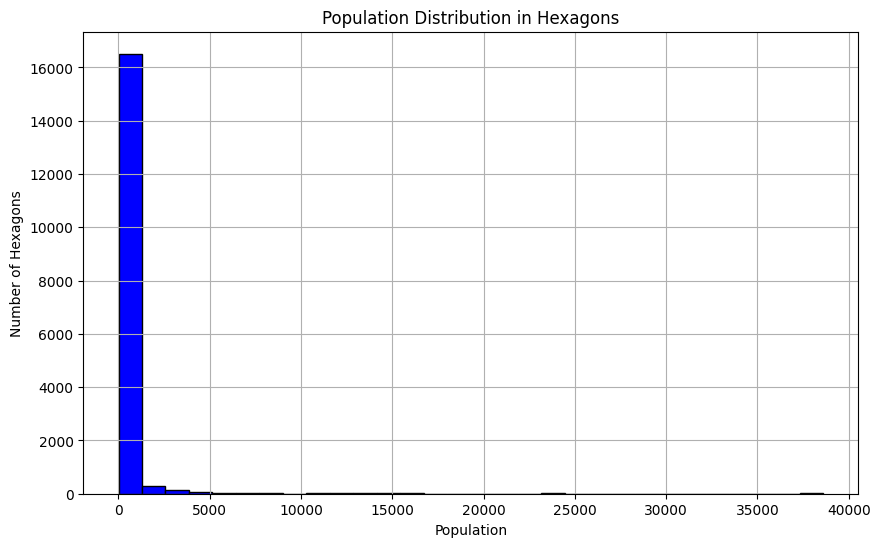

In [14]:
import matplotlib.pyplot as plt

population_data = hexbin_gdf['population']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(population_data, bins=30, color='blue', edgecolor='black')

plt.title('Population Distribution in Hexagons')
plt.xlabel('Population')
plt.ylabel('Number of Hexagons')
plt.grid(True)
plt.show()

In [15]:
shake_gdf['shake'] = shake_gdf['properties'].apply(lambda x: float(x['paramvalue']))

# Perform the spatial join
joined_gdf = gpd.sjoin(hexbin_gdf, shake_gdf, how="left", op='intersects')
joined_gdf


/Users/zacdez/.pyenv/versions/3.10.5/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,type_left,geometry,id_left,properties_left,links_left,population,index_right,type_right,id_right,properties_right,links_right,shake
0,Feature,"POLYGON ((63.91935 35.98825, 63.92083 35.98330...",0103000020E6100000010000000700000078E04E31ADF5...,"{'h3': '88436bdb1dfffff', 'id': 39, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",2,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01
1,Feature,"POLYGON ((63.90110 35.99282, 63.90258 35.98787...",0103000020E6100000010000000700000086E8132557F3...,"{'h3': '88436bdb55fffff', 'id': 30, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",10,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01
2,Feature,"POLYGON ((63.89486 35.97605, 63.89634 35.97110...",0103000020E61000000100000007000000D1A19BB68AF2...,"{'h3': '88436bdb0dfffff', 'id': 40, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",6,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01
3,Feature,"POLYGON ((63.91310 35.97149, 63.91458 35.96654...",0103000020E610000001000000070000006BC76B9BE0F4...,"{'h3': '88436bdb07fffff', 'id': 41, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",4,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01
4,Feature,"POLYGON ((63.90554 35.97796, 63.90702 35.97301...",0103000020E61000000100000007000000953AB6C8E8F3...,"{'h3': '88436bdb01fffff', 'id': 44, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",1,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
17212,Feature,"POLYGON ((64.16521 35.89890, 64.16667 35.89395...",0103000020E61000000100000007000000B0FC37D9920A...,"{'h3': '88436bc82bfffff', 'id': 146, 'populati...","[{'title': 'Collection', 'href': 'http://eoapi...",1,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01
17213,Feature,"POLYGON ((64.15453 35.89702, 64.15599 35.89207...",0103000020E6100000010000000700000008B427C9E309...,"{'h3': '88436bc829fffff', 'id': 147, 'populati...","[{'title': 'Collection', 'href': 'http://eoapi...",1,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01
17214,Feature,"POLYGON ((64.17274 35.89241, 64.17420 35.88746...",0103000020E610000001000000070000008BA593400E0B...,"{'h3': '88436bc823fffff', 'id': 149, 'populati...","[{'title': 'Collection', 'href': 'http://eoapi...",1,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01
17215,Feature,"POLYGON ((64.17712 35.87755, 64.17858 35.87260...",0103000020E61000000100000007000000F84CFAF5550B...,"{'h3': '88436bc9cdfffff', 'id': 95, 'populatio...","[{'title': 'Collection', 'href': 'http://eoapi...",2,21,Feature,0106000020E6100000D100000001030000000100000009...,"{'area': 7.159832520022941, 'grid_code': 0, 'i...","[{'title': 'Collection', 'href': 'http://eoapi...",0.01


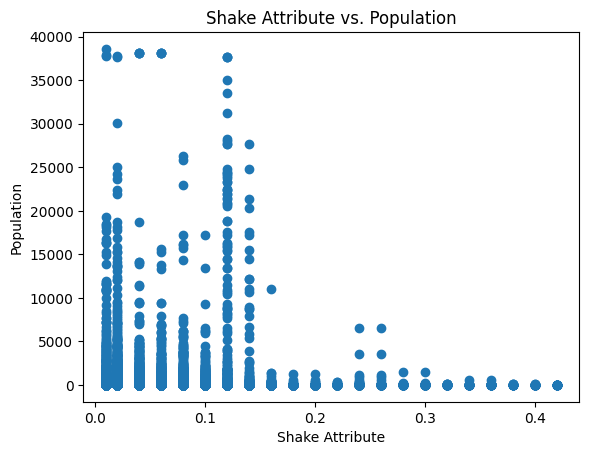

In [16]:
import matplotlib.pyplot as plt

# Assuming 'shake' and 'population' are columns in your joined GeoDataFrame
plt.scatter(joined_gdf['shake'], joined_gdf['population'])
plt.xlabel('Shake Attribute')
plt.ylabel('Population')
plt.title('Shake Attribute vs. Population')
plt.show()


In [17]:
population_threshold = joined_gdf['population'].quantile(0.9)
shake_threshold = joined_gdf['shake'].quantile(0.9)

high_risk_areas = joined_gdf[(joined_gdf['population'] > population_threshold) & (joined_gdf['shake'] > shake_threshold)]
high_risk_gdf = gpd.GeoDataFrame(high_risk_areas, geometry='geometry')

In [18]:
viz(high_risk_gdf)


Map(layers=[SolidPolygonLayer(table=pyarrow.Table
type_left: string
id_left: string
properties_left: struct<h3…